In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy import stats
sns.set()
svm_data = pd.read_csv("C:\Project_Files\Capstone1_Files\German_CreditRating_Cleaned_Data.csv")

In [166]:
svm_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status_sex,debtors_guarontors,...,property,age,installment_plans,housing,credits_at_bank,job,people_liable,telephone,worker,credibility
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,0


In [115]:
svm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_account_status    1000 non-null int64
duration                   1000 non-null int64
credit_history             1000 non-null int64
purpose                    1000 non-null int64
credit_amount              1000 non-null int64
savings_account            1000 non-null int64
present_employment         1000 non-null int64
installment_rate           1000 non-null int64
personal_status_sex        1000 non-null int64
debtors_guarontors         1000 non-null int64
present_residence          1000 non-null int64
property                   1000 non-null int64
age                        1000 non-null int64
installment_plans          1000 non-null int64
housing                    1000 non-null int64
credits_at_bank            1000 non-null int64
job                        1000 non-null int64
people_liable              1000 non-null int64
telephone                  1000 non-null int64
w

In [167]:
duration_data = svm_data['duration']
credit_data = svm_data['credit_amount']
age_data = svm_data['age']
credibility_data = svm_data['credibility']
svm_data.drop(['duration','credit_amount','age','credibility'],axis=1,inplace=True)
#svm_data.drop(['duration','credit_amount','age','credibility','installment_rate','present_residence','job','telephone'],axis=1,inplace=True)


In [117]:
    svm_data.head()

,checking_account_status,credit_history,purpose,savings_account,present_employment,installment_rate,personal_status_sex,debtors_guarontors,present_residence,property,installment_plans,housing,credits_at_bank,job,people_liable,telephone,worker
0,1,4,3,5,5,4,3,1,4,1,3,2,2,3,1,2,1
1,2,2,3,1,3,2,2,1,2,1,3,2,1,3,1,1,1
2,4,4,6,1,4,2,3,1,3,1,3,2,1,2,2,1,1
3,1,2,2,1,4,2,3,3,4,2,3,3,1,3,2,1,1
4,1,3,0,1,3,3,3,1,4,4,3,3,2,3,2,1,1


In [168]:
# binray transfomration of categorical features and put back the numerical features
svm_data = pd.concat([pd.get_dummies(svm_data[col]) for col in svm_data],axis=1,keys=svm_data.columns)
svm_data['credit_amount'] = credit_data
svm_data['duration'] = duration_data
svm_data['age'] = age_data

In [169]:
svm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
(checking_account_status, 1)    1000 non-null uint8
(checking_account_status, 2)    1000 non-null uint8
(checking_account_status, 3)    1000 non-null uint8
(checking_account_status, 4)    1000 non-null uint8
(credit_history, 0)             1000 non-null uint8
(credit_history, 1)             1000 non-null uint8
(credit_history, 2)             1000 non-null uint8
(credit_history, 3)             1000 non-null uint8
(credit_history, 4)             1000 non-null uint8
(purpose, 0)                    1000 non-null uint8
(purpose, 1)                    1000 non-null uint8
(purpose, 2)                    1000 non-null uint8
(purpose, 3)                    1000 non-null uint8
(purpose, 4)                    1000 non-null uint8
(purpose, 5)                    1000 non-null uint8
(purpose, 6)                    1000 non-null uint8
(purpose, 8)                    1000 non-null uint8
(purpose, 

In [120]:
svm_data.head()

checking_account_status          credit_history             purpose ... job  \
                        1  2  3  4              0  1  2  3  4       0 ...   4   
0                       1  0  0  0              0  0  0  0  1       0 ...   0   
1                       0  1  0  0              0  0  1  0  0       0 ...   0   
2                       0  0  0  1              0  0  0  0  1       0 ...   0   
3                       1  0  0  0              0  0  1  0  0       0 ...   0   
4                       1  0  0  0              0  0  0  1  0       1 ...   0   

  people_liable    telephone    worker    credit_amount duration age  
              1  2         1  2      1  2                             
0             1  0         0  1      1  0          1169        6  67  
1             1  0         1  0      1  0          5951       48  22  
2             0  1         1  0      1  0          2096       12  49  
3             0  1         1  0      1  0          7882       42  45  
4             0  1         1  0      1  0          4870       24  53  

[5 rows x 70 columns]

In [170]:
# Linear SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,SVC

X_train,X_test,y_train,y_test = train_test_split(svm_data,credibility_data,test_size=0.20,random_state=42)

In [171]:
y_train.value_counts()

1    559
0    241
Name: credibility, dtype: int64

In [172]:
# Evaluation of all the Algorithms using Standardised Data

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
#pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledLinearSVM', Pipeline([('Scaler', StandardScaler()),('SVM', LinearSVC())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.738750 (0.062111)
ScaledKNN: 0.693750 (0.063799)
ScaledCART: 0.642500 (0.055396)
ScaledNB: 0.685000 (0.082500)
ScaledLinearSVM: 0.740000 (0.059634)
ScaledSVM: 0.745000 (0.043373)


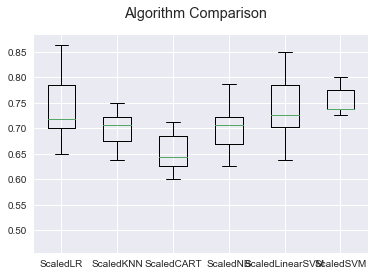

In [173]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [174]:
# Tuning Logistic Regression 

log_steps = [("Scaler",StandardScaler()),
             ("log_clf",LogisticRegression())]
log_pipeline = Pipeline(log_steps)

# parameters of an Estimator  -->  log_pipeline.get_params().keys()
parameters_log = dict(log_clf__C=[.0001,.001,.01,.1,1,10])
grid_log = GridSearchCV(log_pipeline,param_grid=parameters_log,cv=5)
grid_log_result = grid_log.fit(X_train,y_train)
print("Best: %f using %s" %(grid_log_result.best_score_,grid_log_result.best_params_))
mean_log = grid_log_result.cv_results_['mean_test_score']
std_log = grid_log_result.cv_results_['std_test_score']
params_log = grid_log_result.cv_results_['params']
for mean,std,param in zip(mean_log,std_log,params_log):
   print("%f (%f) with : %r :" %(mean,std,param))

Best: 0.737500 using {'log_clf__C': 0.01}
0.733750 (0.055995) with : {'log_clf__C': 0.0001} :
0.735000 (0.054376) with : {'log_clf__C': 0.001} :
0.737500 (0.049916) with : {'log_clf__C': 0.01} :
0.735000 (0.037291) with : {'log_clf__C': 0.1} :
0.728750 (0.044480) with : {'log_clf__C': 1} :
0.731250 (0.041274) with : {'log_clf__C': 10} :


In [175]:
# Tuning KNNeighbors
knn_steps = [("Scaler",StandardScaler()),
             ("knn_clf",KNeighborsClassifier())]
knn_pipeline = Pipeline(knn_steps)

# parameters of an Estimator  -->  knn_pipeline.get_params().keys()
parameters_knn = dict(knn_clf__n_neighbors=np.arange(1,49))
grid_knn = GridSearchCV(knn_pipeline,param_grid=parameters_knn,cv=5)
grid_knn_result = grid_knn.fit(X_train,y_train)
print("Best: %f using %s" %(grid_knn_result.best_score_,grid_knn_result.best_params_))
mean_knn = grid_knn_result.cv_results_['mean_test_score']
std_knn = grid_knn_result.cv_results_['std_test_score']
params_knn = grid_knn_result.cv_results_['params']
for mean,std,param in zip(mean_knn,std_knn,params_knn):
   print("%f (%f) with : %r :" %(mean,std,param))



Best: 0.731250 using {'knn_clf__n_neighbors': 26}
0.660000 (0.029502) with : {'knn_clf__n_neighbors': 1} :
0.585000 (0.046863) with : {'knn_clf__n_neighbors': 2} :
0.688750 (0.053886) with : {'knn_clf__n_neighbors': 3} :
0.670000 (0.059462) with : {'knn_clf__n_neighbors': 4} :
0.693750 (0.038834) with : {'knn_clf__n_neighbors': 5} :
0.667500 (0.034516) with : {'knn_clf__n_neighbors': 6} :
0.700000 (0.033219) with : {'knn_clf__n_neighbors': 7} :
0.695000 (0.033082) with : {'knn_clf__n_neighbors': 8} :
0.700000 (0.028722) with : {'knn_clf__n_neighbors': 9} :
0.688750 (0.040421) with : {'knn_clf__n_neighbors': 10} :
0.707500 (0.038838) with : {'knn_clf__n_neighbors': 11} :
0.708750 (0.043354) with : {'knn_clf__n_neighbors': 12} :
0.712500 (0.044408) with : {'knn_clf__n_neighbors': 13} :
0.713750 (0.042774) with : {'knn_clf__n_neighbors': 14} :
0.707500 (0.031307) with : {'knn_clf__n_neighbors': 15} :
0.701250 (0.040684) with : {'knn_clf__n_neighbors': 16} :
0.703750 (0.032299) with : {'kn

In [177]:
# Tuning LinearSVC using C hyperparameter

linearSVC_steps = [("Scaler",StandardScaler()),
                     ("svm_clf",LinearSVC())]
linear_svc_clf = Pipeline(linearSVC_steps)

# parameters of an Estimator  -->  linear_svc_clf.get_params().keys()

parameters_linear_svc = dict(svm_clf__C=[0.0001,0.001,0.01,0.1,1,10])
grid_linear_svc = GridSearchCV(linear_svc_clf,param_grid=parameters_linear_svc,cv=5)
grid_linear_svc_result =grid_linear_svc.fit(X_train,y_train)
print("Best: %f using %s" %(grid_linear_svc_result.best_score_,grid_linear_svc_result.best_params_))

Best: 0.741250 using {'svm_clf__C': 0.001}


In [179]:
scaler = StandardScaler().fit(X_train)
scaled_Xtrain = scaler.transform(X_train)
lin_svc = LinearSVC(C=.001)
lin_svc.fit(scaled_Xtrain,y_train)
scaled_Xtest = scaler.transform(X_test)
print(lin_svc.coef_)

[[-0.08943081 -0.03160379  0.02288343  0.09801199 -0.05989214 -0.04586149
  -0.01555989  0.01353454  0.05688587 -0.05747124  0.05005981  0.01688385
   0.0318941  -0.00403083 -0.00587902 -0.0448254   0.0182801  -0.00705068
  -0.03539772 -0.01388048  0.01837405  0.0268045   0.02862273 -0.01378343
  -0.02300323 -0.00757528  0.02019075  0.01831797  0.02130739  0.02301602
  -0.00151443 -0.03314554 -0.0227855  -0.02207292  0.03348898 -0.00625155
  -0.01635787 -0.00918935  0.02904309  0.0311586  -0.02897443  0.00408629
   0.00296898  0.03166888 -0.00502852 -0.00295132 -0.02942605 -0.02879039
  -0.00819012  0.03006825 -0.02902614  0.03343695 -0.01299272  0.01239102
  -0.01235346  0.00508251 -0.01238856  0.0131488   0.01242281 -0.00963355
  -0.00572056  0.00480595 -0.00480595 -0.01500273  0.01500273 -0.02315823
   0.02315823 -0.05681884 -0.06935121  0.05155771]]


In [178]:
# Tuning SVC using C and gamma hyperparameters

svc_steps = [("Scaler",StandardScaler()),
             ("svc_clf",SVC())]
svc_clf = Pipeline(svc_steps)

# parameters of an Estimator  -->  svc_clf.get_params().keys()
parameters_svc = dict(svc_clf__C=[.001,.01,.1,1,10],svc_clf__gamma=[.001,.01,.1,1,5],svc_clf__kernel=['linear','poly','rbf','sigmoid'])
grid_svc = GridSearchCV(svc_clf,param_grid=parameters_svc,cv=5)
grid_svc_result = grid_svc.fit(X_train,y_train)
print("Best: %f using %s" %(grid_svc_result.best_score_,grid_svc_result.best_params_))
mean_svm = grid_svc_result.cv_results_['mean_test_score']
std_svm = grid_svc_result.cv_results_['std_test_score']
params_svm = grid_svc_result.cv_results_['params']
for mean,std,param in zip(mean_svm,std_svm,params_svm):
   print("%f (%f) with : %r :" %(mean,std,param))

Best: 0.743750 using {'svc_clf__C': 1, 'svc_clf__gamma': 0.01, 'svc_clf__kernel': 'rbf'}
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.001, 'svc_clf__kernel': 'linear'} :
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.001, 'svc_clf__kernel': 'poly'} :
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.001, 'svc_clf__kernel': 'rbf'} :
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.001, 'svc_clf__kernel': 'sigmoid'} :
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.01, 'svc_clf__kernel': 'linear'} :
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.01, 'svc_clf__kernel': 'poly'} :
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.01, 'svc_clf__kernel': 'rbf'} :
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.01, 'svc_clf__kernel': 'sigmoid'} :
0.698750 (0.001717) with : {'svc_clf__C': 0.001, 'svc_clf__gamma': 0.1, 'svc_clf__k

In [207]:
# Evaluation on Test Data for SVC
scaler = StandardScaler().fit(X_train)
scaled_Xtrain = scaler.transform(X_train)
model = SVC(C=1,gamma=.01,kernel='rbf',probability= True)
#model = SVC(C=.01,kernel='linear')
print(model.get_params().keys())
model.fit(scaled_Xtrain,y_train)
scaled_Xtest = scaler.transform(X_test)
predicted_y = model.predict(scaled_Xtest)
print("Accuracy score is : %s"%accuracy_score(y_test, predicted_y))
print("Confusion Matrix:-")
print(confusion_matrix(y_test, predicted_y))
print("Classification report:-")
print(classification_report(y_test, predicted_y))
print(y_test.value_counts())

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Accuracy score is : 0.8
Confusion Matrix:-
[[ 26  33]
 [  7 134]]
Classification report:-
             precision    recall  f1-score   support

          0       0.79      0.44      0.57        59
          1       0.80      0.95      0.87       141

avg / total       0.80      0.80      0.78       200

1    141
0     59
Name: credibility, dtype: int64


[[ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 

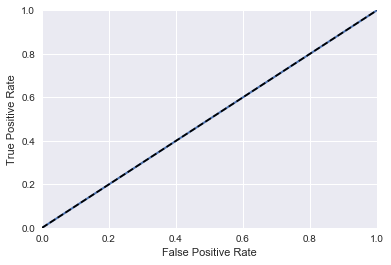

In [209]:
# ROC Curve using predict_proba Function for SVC
probas_ = model.predict_proba(X_test)
print(probas_)
fpr,tpr,_ = roc_curve(y_test,probas_[:,1])
print(fpr)
print(tpr)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

[ 0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605  0.43365605
  0.43365605  0.43365605  0.43365605  0.43365605  0

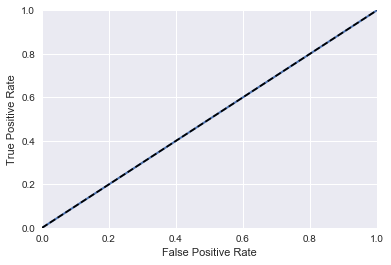

In [211]:
# ROC Curve using Decision Function for SVC

y_scores = model.decision_function(X_test)
print(y_scores)
fpr,tpr,_ = roc_curve(y_test,y_scores)
print(fpr)
print(tpr)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

In [212]:
# Evaluation on Test Data for LinearSVC

scaler = StandardScaler().fit(X_train)
scaled_Xtrain = scaler.transform(X_train)
model2 = SVC(C=.01,kernel='linear')
print(model2.get_params().keys())
model2.fit(scaled_Xtrain,y_train)
scaled_Xtest = scaler.transform(X_test)
predicted_y = model2.predict(scaled_Xtest)
print("Accuracy score is : %s"%accuracy_score(y_test, predicted_y))
print("Confusion Matrix:-")
print(confusion_matrix(y_test, predicted_y))
print("Classification report:-")
print(classification_report(y_test, predicted_y))
print(y_test.value_counts())

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Accuracy score is : 0.78
Confusion Matrix:-
[[ 25  34]
 [ 10 131]]
Classification report:-
             precision    recall  f1-score   support

          0       0.71      0.42      0.53        59
          1       0.79      0.93      0.86       141

avg / total       0.77      0.78      0.76       200

1    141
0     59
Name: credibility, dtype: int64


[ -424.71409318  -581.88476454  -309.44371719  -171.0648768   -967.07094931
  -312.63505671  -276.43029994   -76.70710725  -473.93676225 -1148.51819338
   -60.81092363  -531.03628212  -182.69587269  -978.55993464  -843.08722991
  -550.4712108   -447.332406    -139.29214864  -282.59603362  -484.00672651
 -1183.59518134  -454.78298815  -806.85450944  -193.66288987  -405.48653254
  -242.80322076  -312.25559094  -840.9853197  -1396.51839474  -377.11643391
  -115.73508206  -246.00182303  -201.9530928   -172.5769319   -410.94289466
  -366.53431211  -383.39811797  -278.36612933  -460.93778488  -833.64676593
  -597.84083524  -260.76567626  -499.80349084  -377.2567472   -364.2863413
  -162.55599265  -912.58195039  -119.09244403   -78.87670149   -76.66621375
  -431.98019954  -898.02942108  -209.70765639  -378.29155646  -235.46682379
  -252.49810084  -485.53357221  -170.95463641  -158.66447334  -144.37080677
  -621.77767274  -294.69316343  -847.15153397  -181.37500133  -168.00097752
  -385.469589

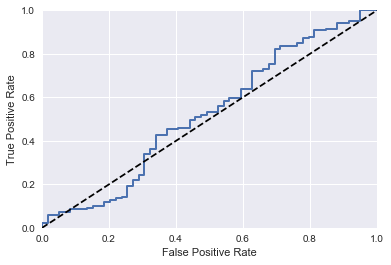

In [213]:
# ROC Curve using Decision Function for SVC

y_scores = model2.decision_function(X_test)
print(y_scores)
fpr,tpr,_ = roc_curve(y_test,y_scores)
print(fpr)
print(tpr)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()